# Task 1.1

?? Why not use l2 norm???
Search up when and when not to use l2 norm i guess?

In [2]:
import numpy as np
from scipy import stats


TC = np.zeros((240, 6))
AV = [0,20,0,0,0,0]
IV = [30,45,60,40,40,40]
duration = [15,20,25,15,20,25]

for j in range(0, 6):
    flag = 1
    on_count = 0
    for i in range(AV[j],240):
        TC[i,j] = flag
        #print(i, j, on_count, flag)
        if (flag):
            on_count+=1
        if (on_count==duration[j]):
            on_count = 0
            flag = 0
        if ((i-AV[j]+1)%IV[j] ==0):
            flag= 1

# for i in range(0, 6):
#     print(np.linalg.norm(TC[:,i]))

TC = stats.zscore(TC)

np.savetxt("data/TC.csv", TC, delimiter=',', header='1,2,3,4,5,6')

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(TC)
df.head()
df.columns
for i in range(0,6):
    plot = sns.lineplot(x=df.index, y=df[i])
    plt.title(f'TC {i+1}')
    plt.xlabel('Time step')
    plt.ylabel('')
    # plt.figure()
    plt.savefig(f'./plots/TC{i+1}')
    plt.clf()

<Figure size 432x288 with 0 Axes>

# TASK 1.2

Text(0.5, 1.0, 'TC Correlation matrix')

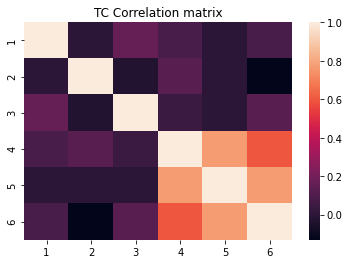

In [4]:
df = df.rename(columns={0:1, 1:2, 2:3, 3:4, 4:5, 5:6})
correlations = np.corrcoef(df, rowvar=False)
# print(correlations)

labels = [1,2,3,4,5,6]
sns.heatmap(correlations, xticklabels=labels, yticklabels=labels)
plt.title("TC Correlation matrix")

# Task 1.3

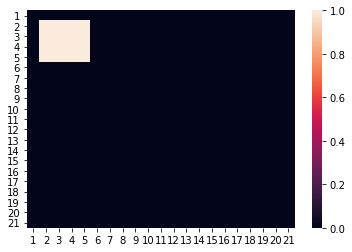

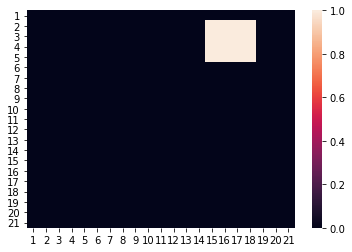

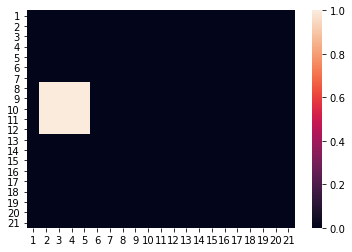

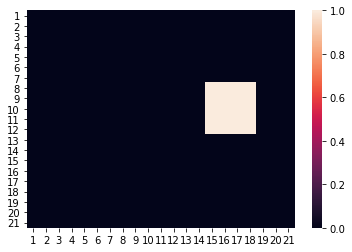

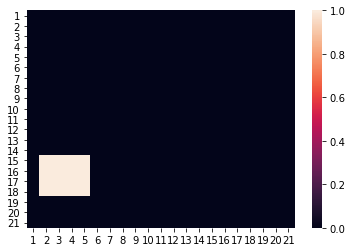

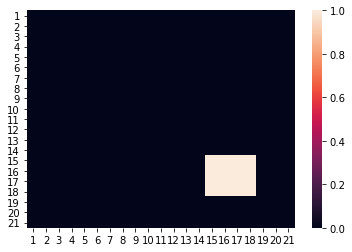

<Figure size 432x288 with 0 Axes>

In [47]:
vert_slices = {0: [2, 6], 1: [2, 6], 2:[8,13], 3:[8,13], 4:[15,19], 5:[15,19]}
hor_slices = {0: [2, 6], 1: [15, 19], 2:[2,6], 3:[15,19], 4:[2,6], 5:[15,19]}

tmpSM = []

for j in range(0,6):
    tmpA = np.zeros((21,21))
    vert = [index-1 for index in vert_slices[j]]
    hor = [index-1 for index in hor_slices[j]]

    tmpA[vert[0]:vert[1], hor[0]:hor[1]] = 1
    tmpSM.append(tmpA.flatten())

    plt.clf()
    sns.heatmap(tmpA, yticklabels=range(1,22), xticklabels=range(1,22))
    plt.figure()

tmpSM = np.asarray(tmpSM)

In [50]:
df = np.matrix.transpose(tmpSM)
df = pd.DataFrame(df)
df.corr

<bound method DataFrame.corr of        0    1    2    3    4    5
0    0.0  0.0  0.0  0.0  0.0  0.0
1    0.0  0.0  0.0  0.0  0.0  0.0
2    0.0  0.0  0.0  0.0  0.0  0.0
3    0.0  0.0  0.0  0.0  0.0  0.0
4    0.0  0.0  0.0  0.0  0.0  0.0
..   ...  ...  ...  ...  ...  ...
436  0.0  0.0  0.0  0.0  0.0  0.0
437  0.0  0.0  0.0  0.0  0.0  0.0
438  0.0  0.0  0.0  0.0  0.0  0.0
439  0.0  0.0  0.0  0.0  0.0  0.0
440  0.0  0.0  0.0  0.0  0.0  0.0

[441 rows x 6 columns]>